In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
plt.rcParams['font.family']=['Heiti TC']
plt.rcParams['figure.figsize']=(20,10)

In [5]:
fn='tutorial/chapter7/demo/data/air_data.csv'
data=pd.read_csv(fn,encoding='utf-8')

In [6]:
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [7]:
explore = data.describe().T

In [8]:
explore

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.00,15747.750000,31494.500000,47241.250000,62988.000000
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000


In [9]:
explore = data.describe(percentiles=[],include='all').T

In [10]:
explore

,count,unique,top,freq,mean,std,min,50%,max
MEMBER_NO,62988.0,NaN,NaN,NaN,31494.5,18183.213715,1.0,31494.5,62988.0
FFP_DATE,62988,3068,2011/1/13,184,NaN,NaN,NaN,NaN,NaN
FIRST_FLIGHT_DATE,62988,3406,2013/2/16,96,NaN,NaN,NaN,NaN,NaN
GENDER,62985,2,男,48134,NaN,NaN,NaN,NaN,NaN
FFP_TIER,62988.0,NaN,NaN,NaN,4.102162,0.373856,4.0,4.0,6.0
WORK_CITY,60719,3309,广州,9385,NaN,NaN,NaN,NaN,NaN
WORK_PROVINCE,59740,1183,广东,17507,NaN,NaN,NaN,NaN,NaN
WORK_COUNTRY,62962,118,CN,57748,NaN,NaN,NaN,NaN,NaN
AGE,62568.0,NaN,NaN,NaN,42.476346,9.885915,6.0,41.0,110.0
LOAD_TIME,62988,1,2014/3/31,62988,NaN,NaN,NaN,NaN,NaN


In [11]:
explore['null'] = len(data) - explore['count']

In [14]:
explore = explore[['null','max','min']]

In [15]:
explore

,null,max,min
MEMBER_NO,0.0,62988.0,1.0
FFP_DATE,0,NaN,NaN
FIRST_FLIGHT_DATE,0,NaN,NaN
GENDER,3,NaN,NaN
FFP_TIER,0.0,6.0,4.0
WORK_CITY,2269,NaN,NaN
WORK_PROVINCE,3248,NaN,NaN
WORK_COUNTRY,26,NaN,NaN
AGE,420.0,110.0,6.0
LOAD_TIME,0,NaN,NaN


In [24]:
ffp = data['FFP_DATE'].apply(lambda x : datetime.strptime(x,'%Y/%m/%d'))

In [25]:
ffp_year = ffp.map(lambda x : x.year)

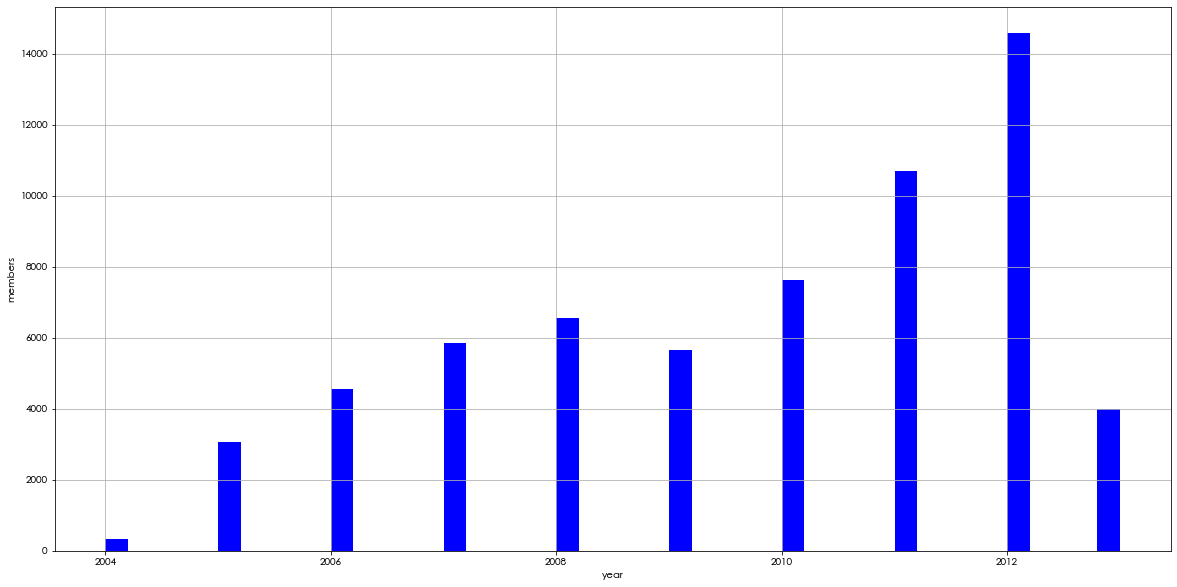

In [30]:
ffp_year.hist(bins='auto',color='blue')
plt.xlabel('year')
plt.ylabel('members')
plt.show()

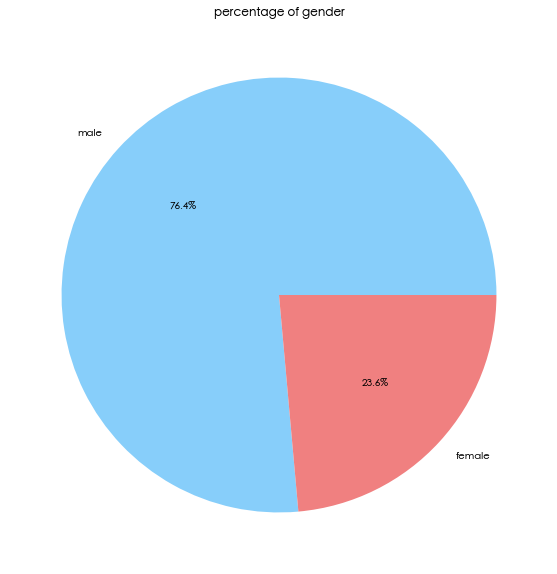

In [34]:
male = pd.value_counts(data['GENDER'])['男']
female = pd.value_counts(data['GENDER'])['女']
plt.pie([male,female],labels=['male','female'],colors=['lightskyblue',"lightcoral"],autopct='%1.1f%%')
plt.title('percentage of gender')
plt.show()

In [39]:
tiers = list(pd.value_counts(data['FFP_TIER']).index)

In [41]:
counts = list(pd.value_counts(data['FFP_TIER']).values)

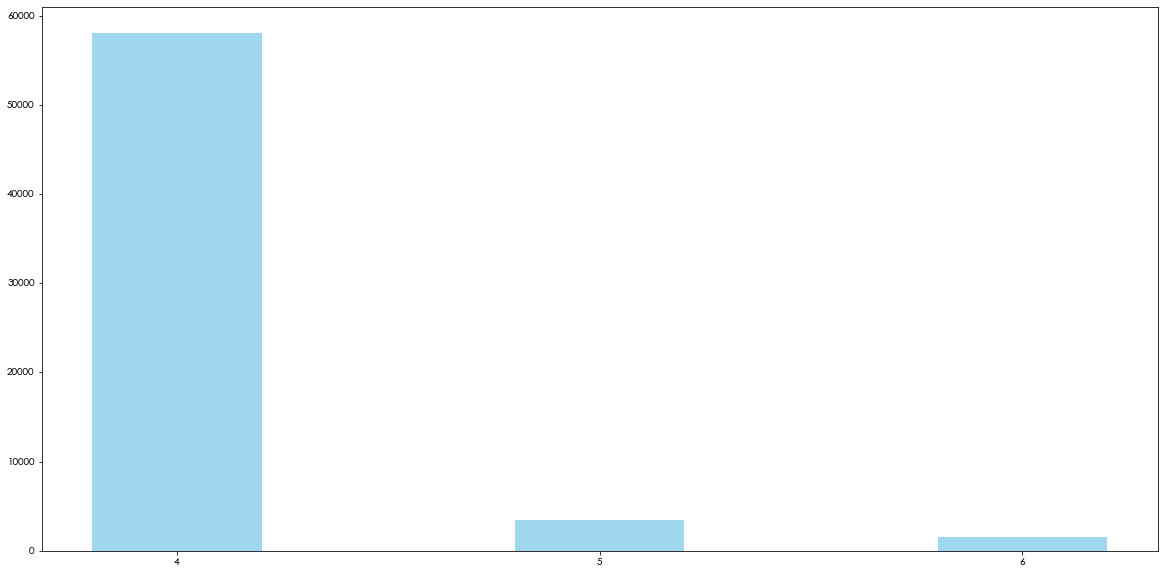

In [48]:
plt.bar(x=range(3),height=counts,width=0.4,alpha=0.8,color='skyblue')
plt.xticks(list(range(3)),['4','5','6'])
plt.show()

In [52]:
age = data['AGE'].dropna()
age = age.astype(np.int64)

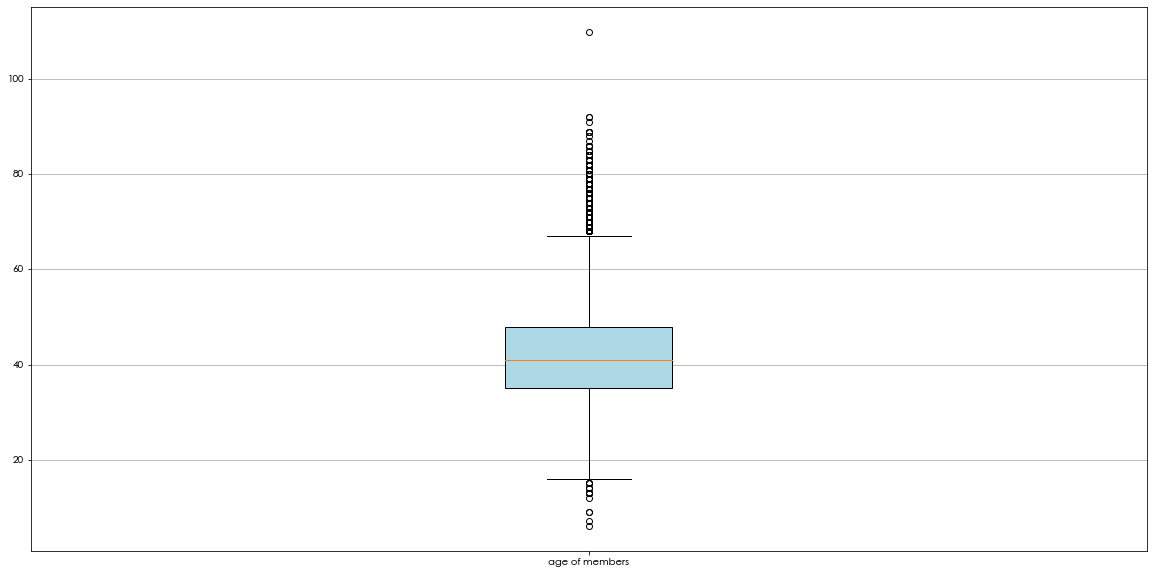

In [58]:
plt.boxplot(age, patch_artist=True, labels=['age of members'], boxprops={'facecolor':'lightblue'})
plt.grid(axis='y')
plt.show()

In [59]:
def draw_boxplot(data, desc):
    plt.boxplot(data, patch_artist=True, labels=['age of members'], boxprops={'facecolor':'lightblue'})
    plt.grid(axis='y')
    plt.title(desc)
    plt.show()

In [60]:
lte = data['LAST_TO_END']
fc = data['FLIGHT_COUNT']
sks = data['SEG_KM_SUM']

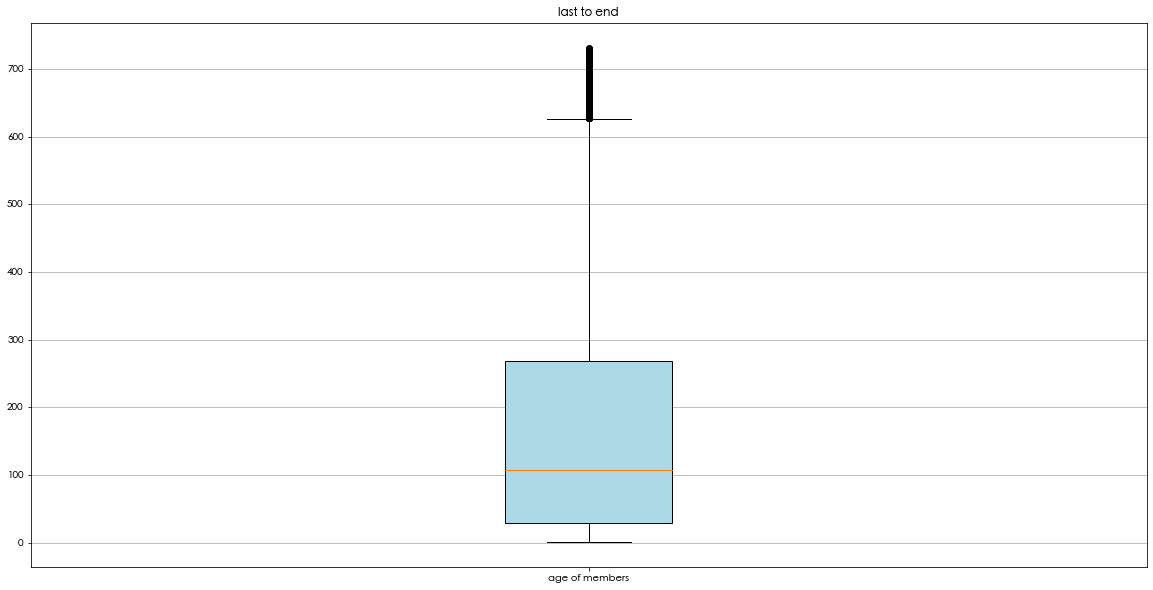

In [61]:
draw_boxplot(lte, 'last to end')

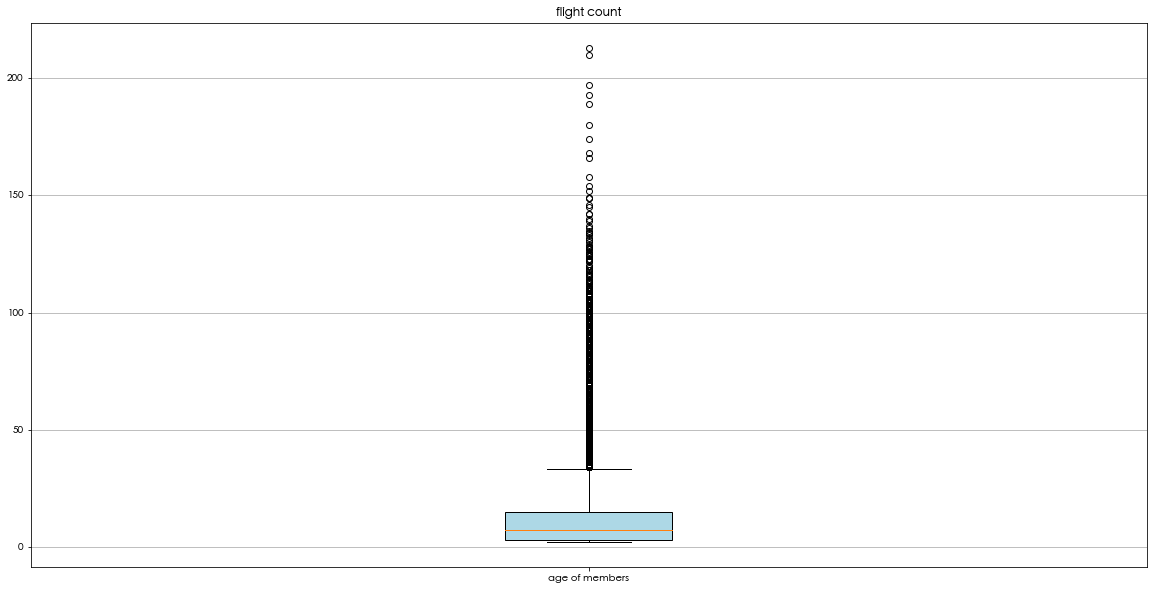

In [62]:
draw_boxplot(fc,'flight count')

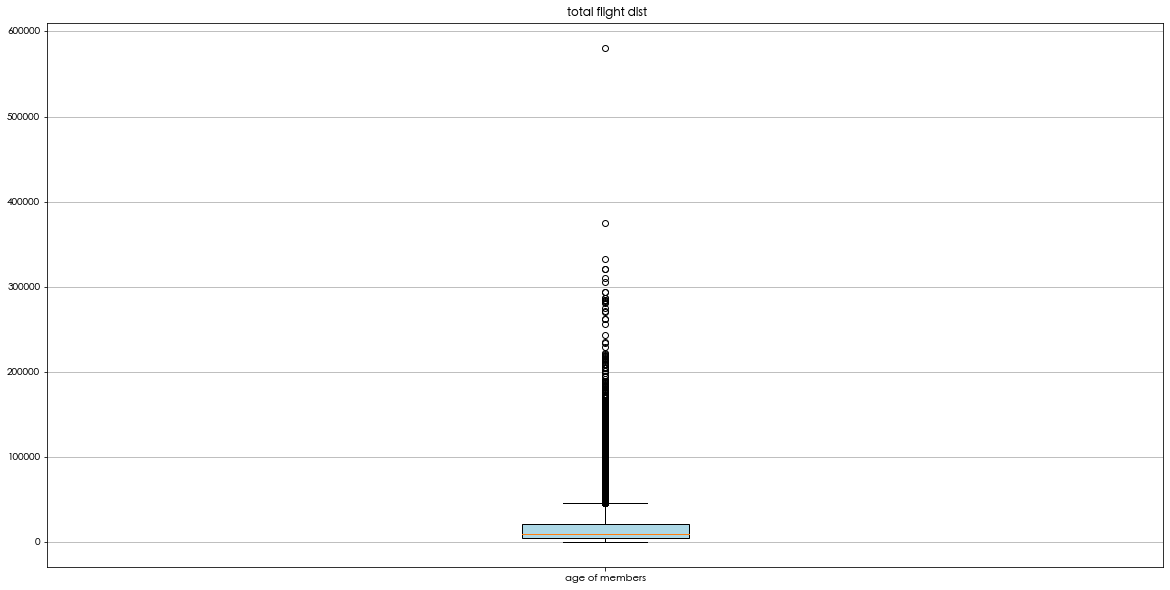

In [63]:
draw_boxplot(sks, ' total flight dist')

In [64]:
ec = data['EXCHANGE_COUNT']

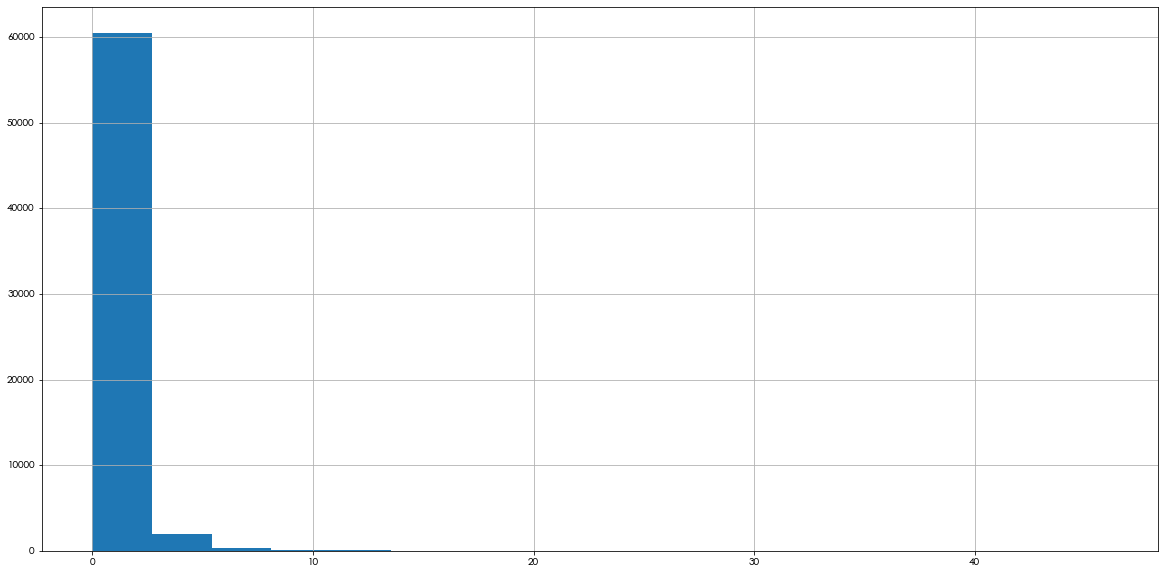

In [66]:
ec.hist(bins='auto')
plt.show()

In [67]:
ps=data['Points_Sum']

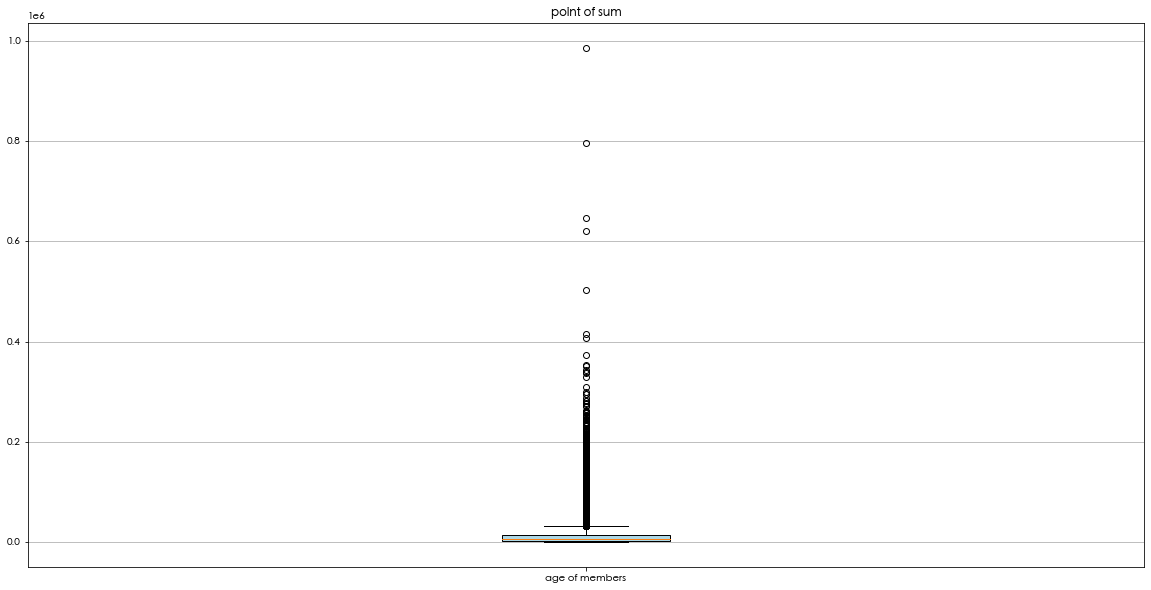

In [68]:
draw_boxplot(ps, 'point of sum')

In [70]:
data_corr = data[['FFP_TIER','FLIGHT_COUNT','LAST_TO_END','SEG_KM_SUM','EXCHANGE_COUNT','Points_Sum']]

In [71]:
data_corr.head()

,FFP_TIER,FLIGHT_COUNT,LAST_TO_END,SEG_KM_SUM,EXCHANGE_COUNT,Points_Sum
0,6,210,1,580717,34,619760
1,6,140,7,293678,29,415768
2,6,135,11,283712,20,406361
3,5,23,97,281336,11,372204
4,6,152,5,309928,27,338813


In [72]:
data_corr['AGE']=data['AGE'].fillna(0).astype(np.int64)
data_corr['ffp_year'] = ffp_year

<ipython-input-72-cc2fdf48d181>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['AGE']=data['AGE'].fillna(0).astype(np.int64)
<ipython-input-72-cc2fdf48d181>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['ffp_year'] = ffp_year


In [73]:
data_corr.head()

,FFP_TIER,FLIGHT_COUNT,LAST_TO_END,SEG_KM_SUM,EXCHANGE_COUNT,Points_Sum,AGE,ffp_year
0,6,210,1,580717,34,619760,31,2006
1,6,140,7,293678,29,415768,42,2007
2,6,135,11,283712,20,406361,40,2007
3,5,23,97,281336,11,372204,64,2008
4,6,152,5,309928,27,338813,48,2009


In [74]:
dt_corr = data_corr.corr(method='pearson')

In [75]:
print(dt_corr)

                FFP_TIER  FLIGHT_COUNT  LAST_TO_END  SEG_KM_SUM  \
FFP_TIER        1.000000      0.582447    -0.206313    0.522350   
FLIGHT_COUNT    0.582447      1.000000    -0.404999    0.850411   
LAST_TO_END    -0.206313     -0.404999     1.000000   -0.369509   
SEG_KM_SUM      0.522350      0.850411    -0.369509    1.000000   
EXCHANGE_COUNT  0.342355      0.502501    -0.169717    0.507819   
Points_Sum      0.559249      0.747092    -0.292027    0.853014   
AGE             0.076245      0.075309    -0.027654    0.087285   
ffp_year       -0.116510     -0.188181     0.117913   -0.171508   

                EXCHANGE_COUNT  Points_Sum       AGE  ffp_year  
FFP_TIER              0.342355    0.559249  0.076245 -0.116510  
FLIGHT_COUNT          0.502501    0.747092  0.075309 -0.188181  
LAST_TO_END          -0.169717   -0.292027 -0.027654  0.117913  
SEG_KM_SUM            0.507819    0.853014  0.087285 -0.171508  
EXCHANGE_COUNT        1.000000    0.578581  0.032760 -0.216610  
Points

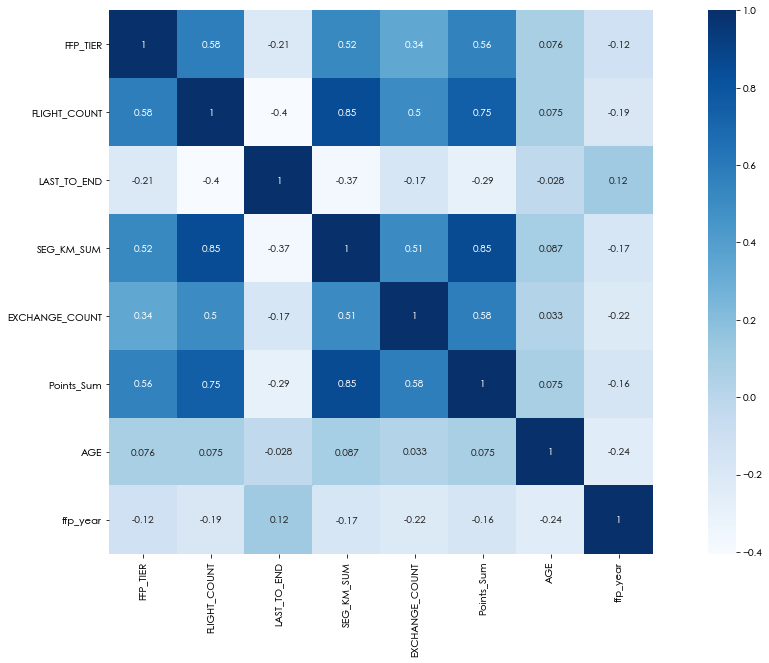

In [77]:
sns.heatmap(dt_corr, annot=True, vmax=1, square=True, cmap='Blues')
plt.show()

In [78]:
fn='tutorial/chapter7/demo/data/air_data.csv'
airline_data = pd.read_csv(fn,encoding='utf-8')

In [79]:
airline_data.shape

(62988, 44)

In [82]:
airline_notnull = airline_data.loc[airline_data['SUM_YR_1'].notnull()&airline_data['SUM_YR_2'].notnull(),:]

In [83]:
airline_notnull.shape

(62299, 44)

In [85]:
index1 = airline_notnull['SUM_YR_1'] != 0 
index2 = airline_notnull['SUM_YR_2'] != 0 
index3 = (airline_notnull['SEG_KM_SUM'] > 0) & (airline_notnull['avg_discount'] != 0)
index4 = airline_notnull['AGE'] > 100

In [86]:
airline = airline_notnull[(index1 | index2) & index3 & ~ index4]

In [87]:
airline.shape

(62043, 44)

In [88]:
airline_selection = airline[['FFP_DATE','LOAD_TIME','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]

In [89]:
airline_selection.head()

,FFP_DATE,LOAD_TIME,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2006/11/2,2014/3/31,1,210,580717,0.961639
1,2007/2/19,2014/3/31,7,140,293678,1.252314
2,2007/2/1,2014/3/31,11,135,283712,1.254676
3,2008/8/22,2014/3/31,97,23,281336,1.090870
4,2009/4/10,2014/3/31,5,152,309928,0.970658


In [90]:
L = pd.to_datetime(airline_selection['LOAD_TIME']) - pd.to_datetime(airline_selection['FFP_DATE'])

In [93]:
L = L.astype('str').str.split().str[0].astype('int')/30

In [95]:
airline_features = pd.concat([L, airline_selection.iloc[:,2:]],axis=1)

In [98]:
airline_scale = StandardScaler().fit_transform(airline_features)

In [103]:
airline_scale[:,0].mean(),airline_scale[:,0].std()

(1.6491490409789087e-16, 0.9999999999999999)

In [104]:
k=5

In [106]:
kmeans_model = KMeans(n_clusters=k,random_state=123)

In [107]:
fit_kmeans = kmeans_model.fit(airline_scale)

In [108]:
kmeans_cc = fit_kmeans.cluster_centers_

In [109]:
print(kmeans_cc)

[[-0.70030628 -0.41502288 -0.16081841 -0.16053724 -0.25728596]
 [ 0.0444681  -0.00249102 -0.23046649 -0.23492871  2.17528742]
 [ 0.48370858 -0.79939042  2.48317171  2.42445742  0.30923962]
 [ 1.1608298  -0.37751261 -0.08668008 -0.09460809 -0.15678402]
 [-0.31319365  1.68685465 -0.57392007 -0.5367502  -0.17484815]]


In [110]:
kmeans_labels = kmeans_model.labels_

In [111]:
print(kmeans_labels)

[2 2 2 ... 0 4 4]


In [112]:
r1 = pd.Series(kmeans_labels).value_counts()

In [113]:
r1

0    24630
3    15733
4    12117
2     5337
1     4226
dtype: int64

In [173]:
cluster_center = pd.DataFrame(kmeans_model.cluster_centers_,columns=['ZL','ZR','ZF','ZM','ZC'])

In [174]:
cluster_center.index = pd.DataFrame(kmeans_model.labels_).drop_duplicates().iloc[:,0]

In [175]:
print(cluster_center)

         ZL        ZR        ZF        ZM        ZC
0                                                  
2 -0.700306 -0.415023 -0.160818 -0.160537 -0.257286
1  0.044468 -0.002491 -0.230466 -0.234929  2.175287
3  0.483709 -0.799390  2.483172  2.424457  0.309240
0  1.160830 -0.377513 -0.086680 -0.094608 -0.156784
4 -0.313194  1.686855 -0.573920 -0.536750 -0.174848


In [176]:
labels = ['Z'+x for x in 'LRFMC']

In [177]:
legen = ['CUSTOM'+str(i+1) for i in cluster_center.index]

In [178]:
lstype = ['-','--',(0,(3,5,1,5,1,5)),':','-']

In [179]:
cluster_center = pd.concat([cluster_center, cluster_center['ZL']],axis=1)

In [180]:
cluster_center

,ZL,ZR,ZF,ZM,ZC,ZL
0,,,,,,
2,-0.700306,-0.415023,-0.160818,-0.160537,-0.257286,-0.700306
1,0.044468,-0.002491,-0.230466,-0.234929,2.175287,0.044468
3,0.483709,-0.799390,2.483172,2.424457,0.309240,0.483709
0,1.160830,-0.377513,-0.086680,-0.094608,-0.156784,1.160830
4,-0.313194,1.686855,-0.573920,-0.536750,-0.174848,-0.313194


In [181]:
centers = np.array(cluster_center.iloc[:,0:])

In [182]:
n = len(labels)

In [183]:
angle = np.linspace(0,2*np.pi,n,endpoint=False)
angle = np.concatenate((angle,[angle[0]]))

In [184]:
centers[0]

array([-0.70030628, -0.41502288, -0.16081841, -0.16053724, -0.25728596,
       -0.70030628])

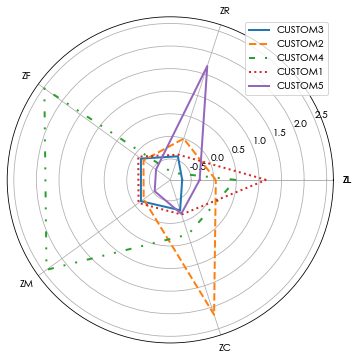

In [186]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,polar=True)
for i in range(len(labels)):
    ax.plot(angle,centers[i],linestyle=lstype[i],linewidth=2,label=labels[i])
ax.set_thetagrids(angle*180/np.pi, labels+[labels[0]])
plt.legend(legen)
plt.show()